In [17]:
import os
import sys
import json
import argparse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

from glob import glob
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.second_level import make_second_level_design_matrix
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import view_img

In [3]:
project_dir = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 'FLT/')

bidsroot = os.path.join(project_dir, 'data_denoised')
deriv_dir = os.path.join(bidsroot, 'derivatives')
fmriprep_dir = os.path.join(deriv_dir, 'denoised_fmriprep-22.1.1')

nilearn_dir = os.path.join(deriv_dir, 'nilearn')
print(nilearn_dir)

task_list = ['tonecat']

/bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn


In [5]:
model_desc = 'run-all_LSS'
maptype = 'tstat'
fwhm_sub = 0.00
space_label = 'MNI152NLin2009cAsym'#'T1w'


In [28]:
out_dir = os.path.join(nilearn_dir, 
                       'level-1_fwhm-%.02f'%fwhm_sub, 
                       f'{model_desc}_{maptype}_concat-4d')
os.makedirs(out_dir, exist_ok=True)

In [26]:
participants_fpath = os.path.join(bidsroot, 'participants.tsv')
participants_df = pd.read_csv(participants_fpath, sep='\t')

# subjects to ignore (not fully processed, etc.)
ignore_subs = ['sub-FLT27', # no functional MRI data acquired
               'sub-FLT07', # bad QA 11/14/23
              ]
participants_df.drop(participants_df[participants_df.participant_id.isin(ignore_subs)].index, inplace=True)

# re-sort by participant ID
participants_df.sort_values(by=['participant_id'], ignore_index=True, inplace=True)

In [7]:
# create group-specific lists of subject IDs
sub_list_mand = list(participants_df.participant_id[participants_df.group=='Mandarin'])
sub_list_nman = list(participants_df.participant_id[participants_df.group=='non-Mandarin'])
sub_dict = {'Mandarin': sub_list_mand, 'non-Mandarin': sub_list_nman}

In [30]:
for group_id, vals in sub_dict.items(): # ['FLT07'] # sub_list
    for sub_id in vals:
        nilearn_sub_dir = os.path.join(nilearn_dir, 
                                           'level-1_fwhm-%.02f'%fwhm_sub, 
                                           '%s_space-%s'%(sub_id, space_label))

        # run-specific stimulus beta maps
        stat_maps = sorted(glob(nilearn_sub_dir+f'/{model_desc}/*di*map-{maptype}.nii.gz')) 

        fmri_img = concat_imgs(stat_maps)
        fmean_img = mean_img(fmri_img)

        sub_out_fpath = os.path.join(out_dir, f'{sub_id}_group-{group_id}_{model_desc}_{maptype}.nii')
        nib.save(fmri_img, sub_out_fpath)
        print('saved to ', sub_out_fpath)

saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-4d/sub-FLT03_group-Mandarin_run-all_LSS_tstat.nii
saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-4d/sub-FLT05_group-Mandarin_run-all_LSS_tstat.nii
saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-4d/sub-FLT08_group-Mandarin_run-all_LSS_tstat.nii
saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-4d/sub-FLT15_group-Mandarin_run-all_LSS_tstat.nii
saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-4d/sub-FLT17_group-Mandarin_run-all_LSS_tstat.nii
saved to  /bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00/run-all_LSS_tstat_concat-

In [31]:
new_img = nib.load(sub_out_fpath)

In [32]:
new_img.get_fdata().shape

(129, 153, 129, 16)

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:219: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



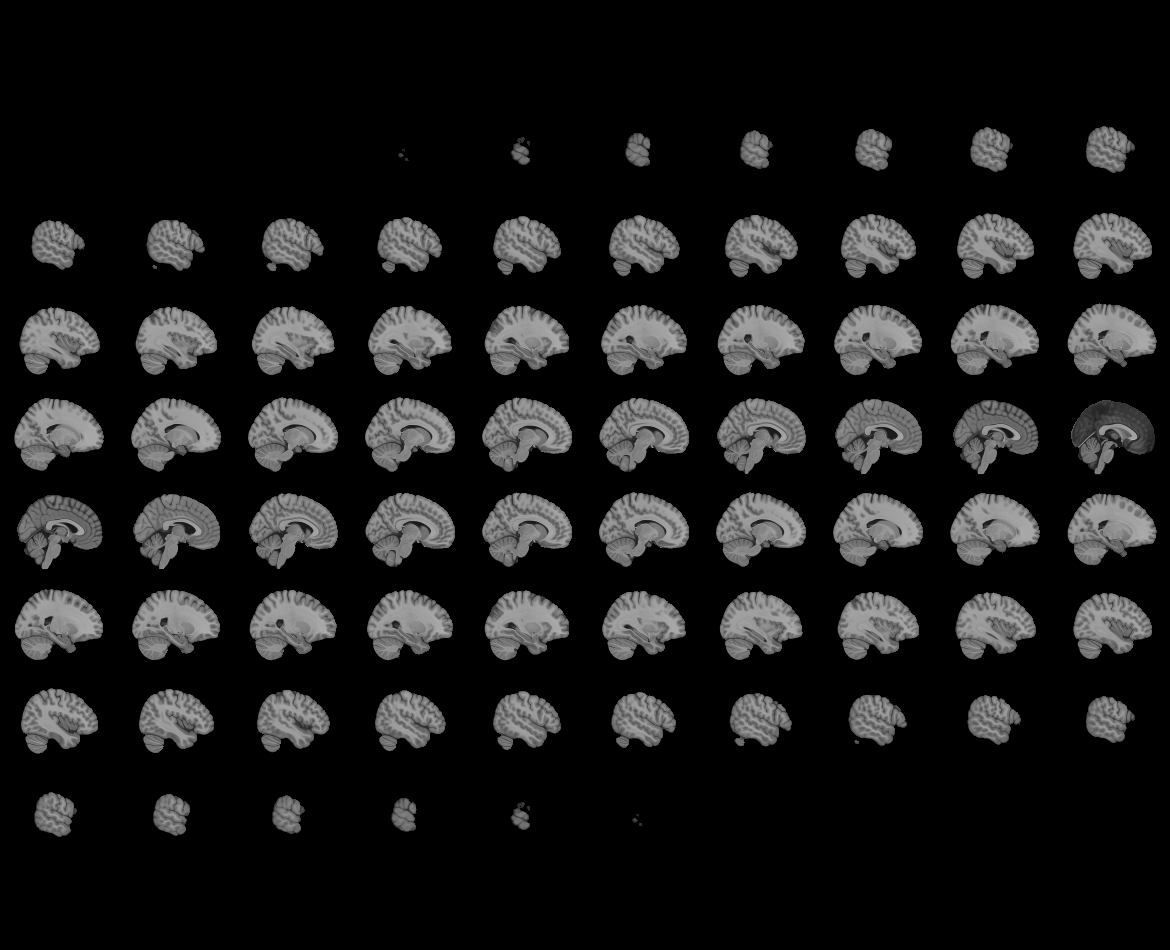
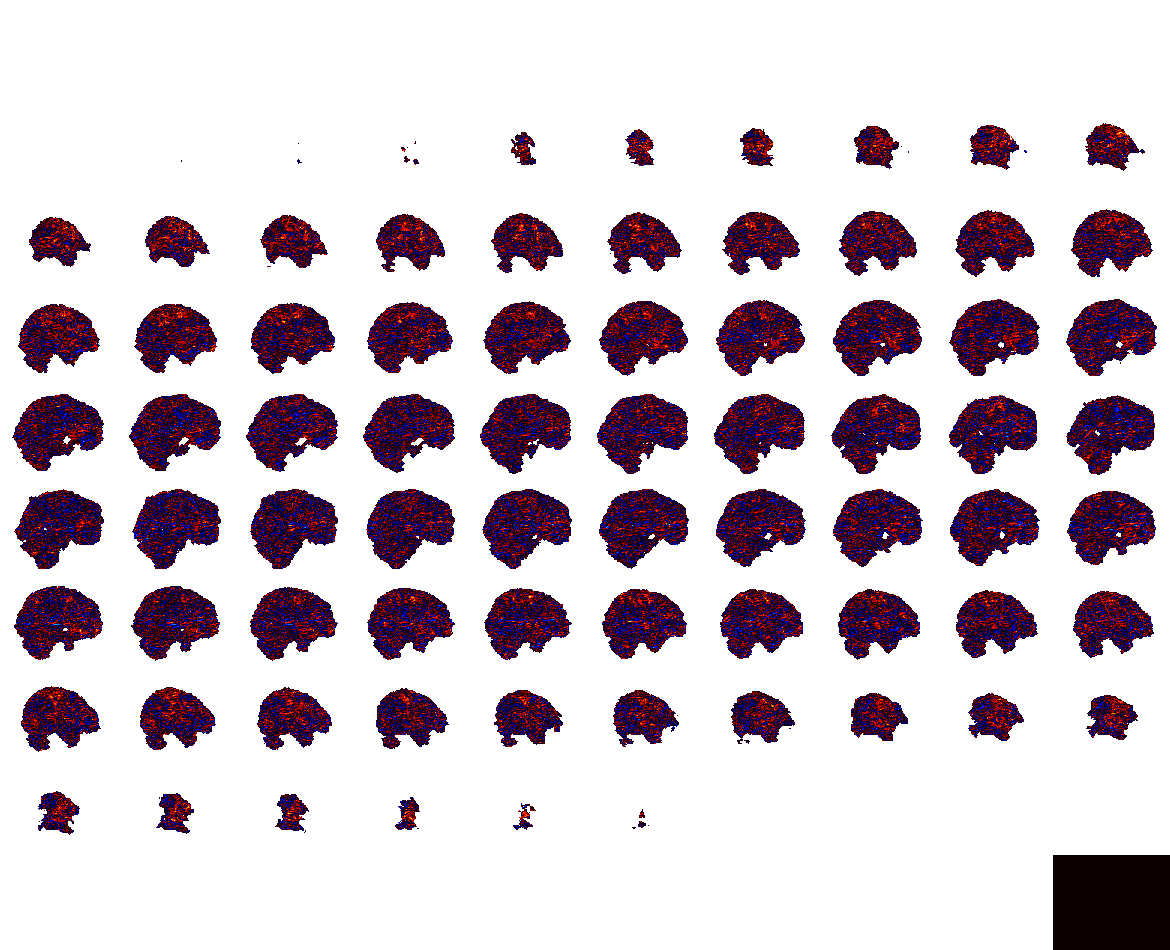

In [25]:
view_img(fmean_img)